#Import Libraries

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blis                             0.7.9


In [ ]:
!pip install mediapipe
!pip install -q kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 45.1 MB/s eta 0:00:00


In [ ]:
# Import the much needed stuff for training
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import mediapipe as mp
import os
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

# Checking Tensorflow Version
tf.__version__

'2.12.0'

#Extract Feature from images

In [ ]:
# Function to Extract Feature from images or Frame
def extract_feature(input_image):
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    image = cv.imread(input_image)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1) as hands:
        while True:
            results = hands.process(cv.flip(cv.cvtColor(image, cv.COLOR_BGR2RGB), 1))
            image_height, image_width, _ = image.shape
            # Print handedness (left v.s. right hand).
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Handedness of {input_image}:')
            #print(results.multi_handedness)

            # Draw hand landmarks of each hand.
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Hand landmarks of {input_image}:')
            if not results.multi_hand_landmarks:
                # Here we will set whole landmarks into zero as no handpose detected
                # in a picture wanted to extract.

                # pgelang tangan
                pgelangX = 0
                pgelangY = 0
                pgelangZ = 0

                # jempol Finger
                jempol_CmcX = 0
                jempol_CmcY = 0
                jempol_CmcZ = 0

                jempol_McpX = 0
                jempol_McpY = 0
                jempol_McpZ = 0

                jempol_IpX = 0
                jempol_IpY = 0
                jempol_IpZ = 0

                jempol_TipX = 0
                jempol_TipY = 0
                jempol_TipZ = 0

                # telunjuk Finger
                telunjuk_McpX = 0
                telunjuk_McpY = 0
                telunjuk_McpZ = 0

                telunjuk_PipX = 0
                telunjuk_PipY = 0
                telunjuk_PipZ = 0

                telunjuk_DipX = 0
                telunjuk_DipY = 0
                telunjuk_DipZ = 0

                telunjuk_TipX = 0
                telunjuk_TipY = 0
                telunjuk_TipZ = 0

                # tengah Finger
                tengah_McpX = 0
                tengah_McpY = 0
                tengah_McpZ = 0

                tengah_PipX = 0
                tengah_PipY = 0
                tengah_PipZ = 0

                tengah_DipX = 0
                tengah_DipY = 0
                tengah_DipZ = 0

                tengah_TipX = 0
                tengah_TipY = 0
                tengah_TipZ = 0

                # manis Finger
                manis_McpX = 0
                manis_McpY = 0
                manis_McpZ = 0

                manis_PipX = 0
                manis_PipY = 0
                manis_PipZ = 0

                manis_DipX = 0
                manis_DipY = 0
                manis_DipZ = 0

                manis_TipX = 0
                manis_TipY = 0
                manis_TipZ = 0

                # kelingking Finger
                kelingking_McpX = 0
                kelingking_McpY = 0
                kelingking_McpZ = 0

                kelingking_PipX = 0
                kelingking_PipY = 0
                kelingking_PipZ = 0

                kelingking_DipX = 0
                kelingking_DipY = 0
                kelingking_DipZ = 0

                kelingking_TipX = 0
                kelingking_TipY = 0
                kelingking_TipZ = 0

                # Set image to Zero
                annotated_image = 0

                # Return Whole Landmark and Image
                return (pgelangX, pgelangY, pgelangZ,
                        jempol_CmcX, jempol_CmcY, jempol_CmcZ,
                        jempol_McpX, jempol_McpY, jempol_McpZ,
                        jempol_IpX, jempol_IpY, jempol_IpZ,
                        jempol_TipX, jempol_TipY, jempol_TipZ,
                        telunjuk_McpX, telunjuk_McpY, telunjuk_McpZ,
                        telunjuk_PipX, telunjuk_PipY, telunjuk_PipZ,
                        telunjuk_DipX, telunjuk_DipY, telunjuk_DipZ,
                        telunjuk_TipX, telunjuk_TipY, telunjuk_TipZ,
                        tengah_McpX, tengah_McpY, tengah_McpZ,
                        tengah_PipX, tengah_PipY, tengah_PipZ,
                        tengah_DipX, tengah_DipY, tengah_DipZ,
                        tengah_TipX, tengah_TipY, tengah_TipZ,
                        manis_McpX, manis_McpY, manis_McpZ,
                        manis_PipX, manis_PipY, manis_PipZ,
                        manis_DipX, manis_DipY, manis_DipZ,
                        manis_TipX, manis_TipY, manis_TipZ,
                        kelingking_McpX, kelingking_McpY, kelingking_McpZ,
                        kelingking_PipX, kelingking_PipY, kelingking_PipZ,
                        kelingking_DipX, kelingking_DipY, kelingking_DipZ,
                        kelingking_TipX, kelingking_TipY, kelingking_TipZ,
                        annotated_image)

            annotated_image = cv.flip(image.copy(), 1)
            for hand_landmarks in results.multi_hand_landmarks:
                # pgelang Hand /  Pergelangan Tangan
                pgelangX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                pgelangY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                pgelangZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                # jempol Finger / Ibu Jari
                jempol_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                jempol_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                jempol_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z

                jempol_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                jempol_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                jempol_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z

                jempol_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                jempol_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                jempol_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z

                jempol_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                jempol_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                jempol_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                # telunjuk Finger / Jari Telunjuk
                telunjuk_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                telunjuk_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                telunjuk_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z

                telunjuk_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                telunjuk_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                telunjuk_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z

                telunjuk_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                telunjuk_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                telunjuk_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z

                telunjuk_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                telunjuk_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                telunjuk_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                # tengah Finger / Jari Tengah
                tengah_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                tengah_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                tengah_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z

                tengah_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                tengah_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                tengah_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z

                tengah_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                tengah_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                tengah_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z

                tengah_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                tengah_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                tengah_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                # manis Finger / Jari Cincin
                manis_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                manis_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                manis_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z

                manis_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                manis_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                manis_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z

                manis_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                manis_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                manis_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z

                manis_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                manis_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                manis_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                # kelingking Finger / Jari Kelingking
                kelingking_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                kelingking_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                kelingking_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z

                kelingking_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                kelingking_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                kelingking_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z

                kelingking_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                kelingking_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                kelingking_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z

                kelingking_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                kelingking_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                kelingking_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                # Draw the Skeleton
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            return (pgelangX, pgelangY, pgelangZ,
                    jempol_CmcX, jempol_CmcY, jempol_CmcZ,
                    jempol_McpX, jempol_McpY, jempol_McpZ,
                    jempol_IpX, jempol_IpY, jempol_IpZ,
                    jempol_TipX, jempol_TipY, jempol_TipZ,
                    telunjuk_McpX, telunjuk_McpY, telunjuk_McpZ,
                    telunjuk_PipX, telunjuk_PipY, telunjuk_PipZ,
                    telunjuk_DipX, telunjuk_DipY, telunjuk_DipZ,
                    telunjuk_TipX, telunjuk_TipY, telunjuk_TipZ,
                    tengah_McpX, tengah_McpY, tengah_McpZ,
                    tengah_PipX, tengah_PipY, tengah_PipZ,
                    tengah_DipX, tengah_DipY, tengah_DipZ,
                    tengah_TipX, tengah_TipY, tengah_TipZ,
                    manis_McpX, manis_McpY, manis_McpZ,
                    manis_PipX, manis_PipY, manis_PipZ,
                    manis_DipX, manis_DipY, manis_DipZ,
                    manis_TipX, manis_TipY, manis_TipZ,
                    kelingking_McpX, kelingking_McpY, kelingking_McpZ,
                    kelingking_PipX, kelingking_PipY, kelingking_PipZ,
                    kelingking_DipX, kelingking_DipY, kelingking_DipZ,
                    kelingking_TipX, kelingking_TipY, kelingking_TipZ,
                    annotated_image)

#create CSV file

In [ ]:
#Function to create CSV file or add dataset to the existed CSV file
def toCSV(filecsv, class_type,
          pgelangX, pgelangY, pgelangZ,
          jempol_CmcX, jempol_CmcY, jempol_CmcZ,
          jempol_McpX, jempol_McpY, jempol_McpZ,
          jempol_IpX, jempol_IpY, jempol_IpZ,
          jempol_TipX, jempol_TipY, jempol_TipZ,
          telunjuk_McpX, telunjuk_McpY, telunjuk_McpZ,
          telunjuk_PipX, telunjuk_PipY, telunjuk_PipZ,
          telunjuk_DipX, telunjuk_DipY, telunjuk_DipZ,
          telunjuk_TipX, telunjuk_TipY, telunjuk_TipZ,
          tengah_McpX, tengah_McpY, tengah_McpZ,
          tengah_PipX, tengah_PipY, tengah_PipZ,
          tengah_DipX, tengah_DipY, tengah_DipZ,
          tengah_TipX, tengah_TipY, tengah_TipZ,
          manis_McpX, manis_McpY, manis_McpZ,
          manis_PipX, manis_PipY, manis_PipZ,
          manis_DipX, manis_DipY, manis_DipZ,
          manis_TipX, manis_TipY, manis_TipZ,
          kelingking_McpX, kelingking_McpY, kelingking_McpZ,
          kelingking_PipX, kelingking_PipY, kelingking_PipZ,
          kelingking_DipX, kelingking_DipY, kelingking_DipZ,
          kelingking_TipX, kelingking_TipY, kelingking_TipZ):
    if os.path.isfile(filecsv):
        #print ("File exist thus shall write append to the file")
        with open(filecsv, 'a+', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow([class_type,
                             pgelangX, pgelangY, pgelangZ,
                             jempol_CmcX, jempol_CmcY, jempol_CmcZ,
                             jempol_McpX, jempol_McpY, jempol_McpZ,
                             jempol_IpX, jempol_IpY, jempol_IpZ,
                             jempol_TipX, jempol_TipY, jempol_TipZ,
                             telunjuk_McpX, telunjuk_McpY, telunjuk_McpZ,
                             telunjuk_PipX, telunjuk_PipY, telunjuk_PipZ,
                             telunjuk_DipX, telunjuk_DipY, telunjuk_DipZ,
                             telunjuk_TipX, telunjuk_TipY, telunjuk_TipZ,
                             tengah_McpX, tengah_McpY, tengah_McpZ,
                             tengah_PipX, tengah_PipY, tengah_PipZ,
                             tengah_DipX, tengah_DipY, tengah_DipZ,
                             tengah_TipX, tengah_TipY, tengah_TipZ,
                             manis_McpX, manis_McpY, manis_McpZ,
                             manis_PipX, manis_PipY, manis_PipZ,
                             manis_DipX, manis_DipY, manis_DipZ,
                             manis_TipX, manis_TipY, manis_TipZ,
                             kelingking_McpX, kelingking_McpY, kelingking_McpZ,
                             kelingking_PipX, kelingking_PipY, kelingking_PipZ,
                             kelingking_DipX, kelingking_DipY, kelingking_DipZ,
                             kelingking_TipX, kelingking_TipY, kelingking_TipZ])
    else:
        #print ("File not exist thus shall create new file as", filecsv)
        with open(filecsv, 'w', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow(["class_type",
                             "pgelangX", "pgelangY", "pgelangZ",
                             "jempol_CmcX", "jempol_CmcY", "jempol_CmcZ",
                             "jempol_McpX", "jempol_McpY", "jempol_McpZ",
                             "jempol_IpX", "jempol_IpY", "jempol_IpZ",
                             "jempol_TipX", "jempol_TipY", "jempol_TipZ",
                             "telunjuk_McpX", "telunjuk_McpY", "telunjuk_McpZ",
                             "telunjuk_PipX", "telunjuk_PipY", "telunjuk_PipZ",
                             "telunjuk_DipX", "telunjuk_DipY", "telunjuk_DipZ",
                             "telunjuk_TipX", "telunjuk_TipY", "telunjuk_TipZ",
                             "tengah_McpX", "tengah_McpY", "tengah_McpZ",
                             "tengah_PipX", "tengah_PipY", "tengah_PipZ",
                             "tengah_DipX", "tengah_DipY", "tengah_DipZ",
                             "tengah_TipX", "tengah_TipY", "tengah_TipZ",
                             "manis_McpX", "manis_McpY", "manis_McpZ",
                             "manis_PipX", "manis_PipY", "manis_PipZ",
                             "manis_DipX", "manis_DipY", "manis_DipZ",
                             "manis_TipX", "manis_TipY", "manis_TipZ",
                             "kelingking_McpX", "kelingking_McpY", "kelingking_McpZ",
                             "kelingking_PipX", "kelingking_PipY", "kelingking_PipZ",
                             "kelingking_DipX", "kelingking_DipY", "kelingking_DipZ",
                             "kelingking_TipX", "kelingking_TipY", "kelingking_TipZ"])
            writer.writerow([class_type,
                             pgelangX, pgelangY, pgelangZ,
                             jempol_CmcX, jempol_CmcY, jempol_CmcZ,
                             jempol_McpX, jempol_McpY, jempol_McpZ,
                             jempol_IpX, jempol_IpY, jempol_IpZ,
                             jempol_TipX, jempol_TipY, jempol_TipZ,
                             telunjuk_McpX, telunjuk_McpY, telunjuk_McpZ,
                             telunjuk_PipX, telunjuk_PipY, telunjuk_PipZ,
                             telunjuk_DipX, telunjuk_DipY, telunjuk_DipZ,
                             telunjuk_TipX, telunjuk_TipY, telunjuk_TipZ,
                             tengah_McpX, tengah_McpY, tengah_McpZ,
                             tengah_PipX, tengah_PipY, tengah_PipZ,
                             tengah_DipX, tengah_DipY, tengah_DipZ,
                             tengah_TipX, tengah_TipY, tengah_TipZ,
                             manis_McpX, manis_McpY, manis_McpZ,
                             manis_PipX, manis_PipY, manis_PipZ,
                             manis_DipX, manis_DipY, manis_DipZ,
                             manis_TipX, manis_TipY, manis_TipZ,
                             kelingking_McpX, kelingking_McpY, kelingking_McpZ,
                             kelingking_PipX, kelingking_PipY, kelingking_PipZ,
                             kelingking_DipX, kelingking_DipY, kelingking_DipZ,
                             kelingking_TipX, kelingking_TipY, kelingking_TipZ])

#Import Dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1BKEEHb27_5C6ycltMp9NHKAZgbPkIab2

Downloading...
From: https://drive.google.com/uc?id=1BKEEHb27_5C6ycltMp9NHKAZgbPkIab2
To: /content/archive.zip
100% 1.88G/1.88G [00:29<00:00, 63.8MB/s]


In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/desktop.ini  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/A (4).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/B (4).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/C (2).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/D (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/E (2).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/F (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/test/G (3).jpg  
  inflating: SIBI_datasets_LEMLITBANG_SIBI_R_90.10_RAW/SIBI_

In [ ]:
# Extract Feature for Training
# We will using SIBI datasets version V02
paths = "/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training"
csv_path = "hands_SIBI_training.csv"

if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")

for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (pgelangX, pgelangY, pgelangZ,
                 jempol_CmcX, jempol_CmcY, jempol_CmcZ,
                 jempol_McpX, jempol_McpY, jempol_McpZ,
                 jempol_IpX, jempol_IpY, jempol_IpZ,
                 jempol_TipX, jempol_TipY, jempol_TipZ,
                 telunjuk_McpX, telunjuk_McpY, telunjuk_McpZ,
                 telunjuk_PipX, telunjuk_PipY, telunjuk_PipZ,
                 telunjuk_DipX, telunjuk_DipY, telunjuk_DipZ,
                 telunjuk_TipX, telunjuk_TipY, telunjuk_TipZ,
                 tengah_McpX, tengah_McpY, tengah_McpZ,
                 tengah_PipX, tengah_PipY, tengah_PipZ,
                 tengah_DipX, tengah_DipY, tengah_DipZ,
                 tengah_TipX, tengah_TipY, tengah_TipZ,
                 manis_McpX, manis_McpY, manis_McpZ,
                 manis_PipX, manis_PipY, manis_PipZ,
                 manis_DipX, manis_DipY, manis_DipZ,
                 manis_TipX, manis_TipY, manis_TipZ,
                 kelingking_McpX, kelingking_McpY, kelingking_McpZ,
                 kelingking_PipX, kelingking_PipY, kelingking_PipZ,
                 kelingking_DipX, kelingking_DipY, kelingking_DipZ,
                 kelingking_TipX, kelingking_TipY, kelingking_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))

                if ((not pgelangX == 0) and (not pgelangY == 0)):
                    toCSV(csv_path, dirlist,
                          pgelangX, pgelangY, pgelangZ,
                          jempol_CmcX, jempol_CmcY, jempol_CmcZ,
                          jempol_McpX, jempol_McpY, jempol_McpZ,
                          jempol_IpX, jempol_IpY, jempol_IpZ,
                          jempol_TipX, jempol_TipY, jempol_TipZ,
                          telunjuk_McpX, telunjuk_McpY, telunjuk_McpZ,
                          telunjuk_PipX, telunjuk_PipY, telunjuk_PipZ,
                          telunjuk_DipX, telunjuk_DipY, telunjuk_DipZ,
                          telunjuk_TipX, telunjuk_TipY, telunjuk_TipZ,
                          tengah_McpX, tengah_McpY, tengah_McpZ,
                          tengah_PipX, tengah_PipY, tengah_PipZ,
                          tengah_DipX, tengah_DipY, tengah_DipZ,
                          tengah_TipX, tengah_TipY, tengah_TipZ,
                          manis_McpX, manis_McpY, manis_McpZ,
                          manis_PipX, manis_PipY, manis_PipZ,
                          manis_DipX, manis_DipY, manis_DipZ,
                          manis_TipX, manis_TipY, manis_TipZ,
                          kelingking_McpX, kelingking_McpY, kelingking_McpZ,
                          kelingking_PipX, kelingking_PipY, kelingking_PipZ,
                          kelingking_DipX, kelingking_DipY, kelingking_DipZ,
                          kelingking_TipX, kelingking_TipY, kelingking_TipZ,)

                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")

print("===================Feature Extraction for TRAINING is Completed===================")

The CSV file does not exist hands_SIBI_training.csv ,Going Create after Extraction
Inside Folder F Consist : 42 Imageset
Inside Folder A Consist : 42 Imageset
Inside Folder I Consist : 46 Imageset
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/I/IMG_20210605_172713.jpg Hand does not have landmarks
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/I/IMG_20210605_172727.jpg Hand does not have landmarks
Inside Folder M Consist : 42 Imageset
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/M/IMG_20210605_173113.jpg Hand does not have landmarks
Inside Folder B Consist : 42 Imageset
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training/B/IMG_20210605_174907.jpg Hand does not have landmarks
Inside Folder G Consist : 42 Imageset
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datas

In [ ]:
# Extract Feature for Validation
# We will using SIBI datasets version V02
paths = "/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation"
csv_path = "hands_SIBI_validation.csv"

if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")

for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (pgelangX, pgelangY, pgelangZ,
                 jempol_CmcX, jempol_CmcY, jempol_CmcZ,
                 jempol_McpX, jempol_McpY, jempol_McpZ,
                 jempol_IpX, jempol_IpY, jempol_IpZ,
                 jempol_TipX, jempol_TipY, jempol_TipZ,
                 telunjuk_McpX, telunjuk_McpY, telunjuk_McpZ,
                 telunjuk_PipX, telunjuk_PipY, telunjuk_PipZ,
                 telunjuk_DipX, telunjuk_DipY, telunjuk_DipZ,
                 telunjuk_TipX, telunjuk_TipY, telunjuk_TipZ,
                 tengah_McpX, tengah_McpY, tengah_McpZ,
                 tengah_PipX, tengah_PipY, tengah_PipZ,
                 tengah_DipX, tengah_DipY, tengah_DipZ,
                 tengah_TipX, tengah_TipY, tengah_TipZ,
                 manis_McpX, manis_McpY, manis_McpZ,
                 manis_PipX, manis_PipY, manis_PipZ,
                 manis_DipX, manis_DipY, manis_DipZ,
                 manis_TipX, manis_TipY, manis_TipZ,
                 kelingking_McpX, kelingking_McpY, kelingking_McpZ,
                 kelingking_PipX, kelingking_PipY, kelingking_PipZ,
                 kelingking_DipX, kelingking_DipY, kelingking_DipZ,
                 kelingking_TipX, kelingking_TipY, kelingking_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))

                if ((not pgelangX == 0) and (not pgelangY == 0)):
                    toCSV(csv_path, dirlist,
                          pgelangX, pgelangY, pgelangZ,
                          jempol_CmcX, jempol_CmcY, jempol_CmcZ,
                          jempol_McpX, jempol_McpY, jempol_McpZ,
                          jempol_IpX, jempol_IpY, jempol_IpZ,
                          jempol_TipX, jempol_TipY, jempol_TipZ,
                          telunjuk_McpX, telunjuk_McpY, telunjuk_McpZ,
                          telunjuk_PipX, telunjuk_PipY, telunjuk_PipZ,
                          telunjuk_DipX, telunjuk_DipY, telunjuk_DipZ,
                          telunjuk_TipX, telunjuk_TipY, telunjuk_TipZ,
                          tengah_McpX, tengah_McpY, tengah_McpZ,
                          tengah_PipX, tengah_PipY, tengah_PipZ,
                          tengah_DipX, tengah_DipY, tengah_DipZ,
                          tengah_TipX, tengah_TipY, tengah_TipZ,
                          manis_McpX, manis_McpY, manis_McpZ,
                          manis_PipX, manis_PipY, manis_PipZ,
                          manis_DipX, manis_DipY, manis_DipZ,
                          manis_TipX, manis_TipY, manis_TipZ,
                          kelingking_McpX, kelingking_McpY, kelingking_McpZ,
                          kelingking_PipX, kelingking_PipY, kelingking_PipZ,
                          kelingking_DipX, kelingking_DipY, kelingking_DipZ,
                          kelingking_TipX, kelingking_TipY, kelingking_TipZ,)

                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")

print("===================Feature Extraction for VALIDATION is Completed===================")

The CSV file does not exist hands_SIBI_validation.csv ,Going Create after Extraction
Inside Folder F Consist : 9 Imageset
Inside Folder A Consist : 9 Imageset
Inside Folder I Consist : 10 Imageset
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/I/IMG_20210605_172731.jpg Hand does not have landmarks
Inside Folder M Consist : 10 Imageset
Inside Folder B Consist : 10 Imageset
Inside Folder G Consist : 10 Imageset
Inside Folder O Consist : 10 Imageset
Inside Folder U Consist : 9 Imageset
Inside Folder R Consist : 9 Imageset
Inside Folder V Consist : 9 Imageset
Inside Folder W Consist : 10 Imageset
Inside Folder X Consist : 9 Imageset
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation/X/D387A9E7-6E91-447D-95C5-637E45855DFD.jpg Hand does not have landmarks
Inside Folder L Consist : 10 Imageset
/content/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02

In [ ]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []


    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        # Plotting
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2),
                        self.metrics[metric],
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2),
                            self.metrics['val_' + metric],
                            label='val_' + metric)

            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [ ]:
# Read CSV file for Training the model using Pandas
df_train = pd.read_csv("hands_SIBI_training.csv", header=0)

# First we must sort the values of the dataset according to the Alphabets
df_train = df_train.sort_values(by=["class_type"])

df_train

,class_type,pgelangX,pgelangY,pgelangZ,jempol_CmcX,jempol_CmcY,jempol_CmcZ,jempol_McpX,jempol_McpY,jempol_McpZ,...,kelingking_McpZ,kelingking_PipX,kelingking_PipY,kelingking_PipZ,kelingking_DipX,kelingking_DipY,kelingking_DipZ,kelingking_TipX,kelingking_TipY,kelingking_TipZ
0,A,440.063572,351.859474,-1.490000e-07,494.795370,335.740399,-0.020177,537.574339,275.552970,-0.021499,...,-0.017773,414.003086,225.643051,-0.030887,419.374752,255.546033,-0.017053,413.781738,270.891792,-0.003715
341,A,290.442419,395.143175,-2.830000e-07,332.826805,367.748809,-0.023210,356.280923,307.998669,-0.027424,...,-0.016441,233.105993,294.614446,-0.046509,246.916366,327.125359,-0.042586,261.150408,348.338091,-0.029653
340,A,290.442419,395.143175,-2.830000e-07,332.826805,367.748809,-0.023210,356.280923,307.998669,-0.027424,...,-0.016441,233.105993,294.614446,-0.046509,246.916366,327.125359,-0.042586,261.150408,348.338091,-0.029653
339,A,290.442419,395.143175,-2.830000e-07,332.826805,367.748809,-0.023210,356.280923,307.998669,-0.027424,...,-0.016441,233.105993,294.614446,-0.046509,246.916366,327.125359,-0.042586,261.150408,348.338091,-0.029653
338,A,285.660720,399.051762,-3.340000e-07,327.957988,368.890858,-0.026285,349.432182,307.242215,-0.032038,...,-0.014209,226.864314,291.477549,-0.044316,240.465951,324.559522,-0.039618,254.337168,345.281768,-0.025839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Read CSV file for Validation or Testing the Model using Pandas
df_test = pd.read_csv("hands_SIBI_validation.csv", header=0)

# First we must sort the values of the dataset according to the Alphabets
df_test = df_test.sort_values(by=["class_type"])

df_test

,class_type,pgelangX,pgelangY,pgelangZ,jempol_CmcX,jempol_CmcY,jempol_CmcZ,jempol_McpX,jempol_McpY,jempol_McpZ,...,kelingking_McpZ,kelingking_PipX,kelingking_PipY,kelingking_PipZ,kelingking_DipX,kelingking_DipY,kelingking_DipZ,kelingking_TipX,kelingking_TipY,kelingking_TipZ
0,A,440.063572,351.859474,-1.490000e-07,494.795370,335.740399,-0.020177,537.574339,275.552970,-0.021499,...,-0.017773,414.003086,225.643051,-0.030887,419.374752,255.546033,-0.017053,413.781738,270.891792,-0.003715
341,A,290.442419,395.143175,-2.830000e-07,332.826805,367.748809,-0.023210,356.280923,307.998669,-0.027424,...,-0.016441,233.105993,294.614446,-0.046509,246.916366,327.125359,-0.042586,261.150408,348.338091,-0.029653
340,A,290.442419,395.143175,-2.830000e-07,332.826805,367.748809,-0.023210,356.280923,307.998669,-0.027424,...,-0.016441,233.105993,294.614446,-0.046509,246.916366,327.125359,-0.042586,261.150408,348.338091,-0.029653
339,A,290.442419,395.143175,-2.830000e-07,332.826805,367.748809,-0.023210,356.280923,307.998669,-0.027424,...,-0.016441,233.105993,294.614446,-0.046509,246.916366,327.125359,-0.042586,261.150408,348.338091,-0.029653
338,A,285.660720,399.051762,-3.340000e-07,327.957988,368.890858,-0.026285,349.432182,307.242215,-0.032038,...,-0.014209,226.864314,291.477549,-0.044316,240.465951,324.559522,-0.039618,254.337168,345.281768,-0.025839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Preprocessing

In [ ]:
# Put Categorical using Pandas
df_train["class_type"] = pd.Categorical(df_train["class_type"])
df_train["class_type"] = df_train.class_type.cat.codes

df_test["class_type"] = pd.Categorical(df_test["class_type"])
df_test["class_type"] = df_test.class_type.cat.codes

In [ ]:
# Copy Label and Feature for training
y_train = df_train.pop("class_type")
x_train = df_train.copy()

y_test = df_test.pop("class_type")
x_test = df_test.copy()

# Copied Features turn to Array by using NumPy
x_train = np.array(x_train)
x_test = np.array(x_test)

# # Normalize the Value
# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.fit_transform(x_test)

In [ ]:
# Check Array Shape before transformation
print(x_train.shape)
print(x_test.shape)

# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check Array Shape after transformation
print(x_train.shape)
print(x_test.shape)

(4011, 63)
(4011, 63)
(4011, 63, 1)
(4011, 63, 1)


In [ ]:
# Check sample train and test features
print(x_train[0])
print(x_test[7])

[[440.064]
 [351.859]
 [ -0.   ]
 [494.795]
 [335.74 ]
 [ -0.02 ]
 [537.574]
 [275.553]
 [ -0.021]
 [555.227]
 [225.431]
 [ -0.022]
 [559.428]
 [191.745]
 [ -0.02 ]
 [498.918]
 [223.209]
 [ -0.007]
 [514.349]
 [199.326]
 [ -0.031]
 [510.118]
 [236.853]
 [ -0.044]
 [505.275]
 [249.135]
 [ -0.05 ]
 [463.163]
 [224.47 ]
 [ -0.007]
 [479.485]
 [200.691]
 [ -0.028]
 [479.945]
 [246.257]
 [ -0.032]
 [474.664]
 [261.715]
 [ -0.031]
 [429.367]
 [234.124]
 [ -0.012]
 [444.886]
 [212.093]
 [ -0.036]
 [448.748]
 [255.205]
 [ -0.024]
 [442.432]
 [272.032]
 [ -0.011]
 [394.247]
 [247.507]
 [ -0.018]
 [414.003]
 [225.643]
 [ -0.031]
 [419.375]
 [255.546]
 [ -0.017]
 [413.782]
 [270.892]
 [ -0.004]]
[[275.604]
 [393.551]
 [ -0.   ]
 [317.036]
 [363.341]
 [ -0.025]
 [338.731]
 [304.2  ]
 [ -0.03 ]
 [341.651]
 [253.724]
 [ -0.035]
 [339.24 ]
 [213.751]
 [ -0.036]
 [313.328]
 [267.719]
 [ -0.008]
 [308.3  ]
 [232.007]
 [ -0.042]
 [301.375]
 [266.377]
 [ -0.06 ]
 [301.168]
 [300.646]
 [ -0.064]
 [281.131

In [ ]:
# Number of classes according standard Indonesian Language Alphabets
num_classes = 26

# Using the Keras.Utils to put the label categorically
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#Architecture


In [ ]:
# One Dimensional Convolutional Neural Network model, Train will be feed to 1 Dimension Convolutional Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 63, 32)            192       
                                                                 
 conv1d_9 (Conv1D)           (None, 63, 32)            5152      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 31, 32)           0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 31, 64)            10304     
                                                                 
 conv1d_11 (Conv1D)          (None, 31, 64)            20544     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 15, 64)           0         
 1D)                                                    

#Training

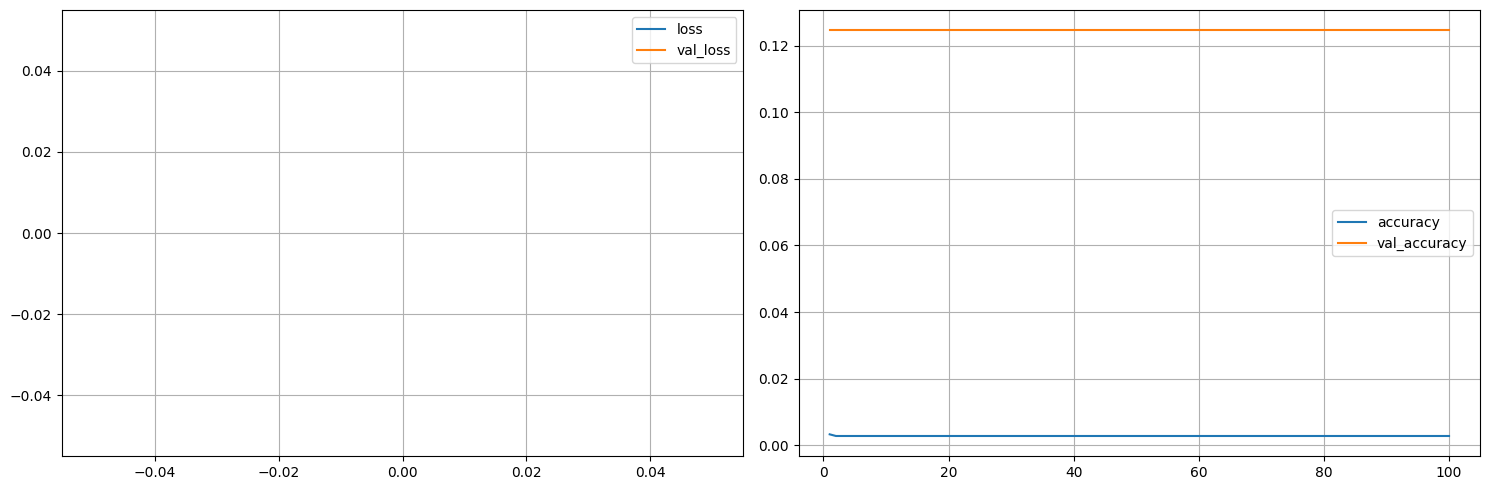

126/126 [==============================] - 2s 18ms/step - loss: nan - accuracy: 0.0027 - val_loss: nan - val_accuracy: 0.1247


In [ ]:
#Train the Model
callbacks_list = [
    PlotLearning(),
    tf.keras.callbacks.ModelCheckpoint(filepath='modelscheckpoint/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')]
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=callbacks_list)

#Save Model

In [ ]:
#Saving the model into H5 system file
save_model = "model_SIBI.h5"
model.save(save_model)
print("Model Saved into", save_model)

Model Saved into model_SIBI.h5


#Predict

In [ ]:
!gdown https://drive.google.com/uc?id=1tvJPuJevdW6LZLnifNVnYbLY2c10fqDe

Downloading...
From: https://drive.google.com/uc?id=1tvJPuJevdW6LZLnifNVnYbLY2c10fqDe
To: /content/SIBIlain.zip
100% 2.90G/2.90G [00:34<00:00, 85.0MB/s]


In [ ]:
!unzip /content/SIBIlain.zip

In [ ]:
# Hard Encode for the Prediction
classes = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25
}

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


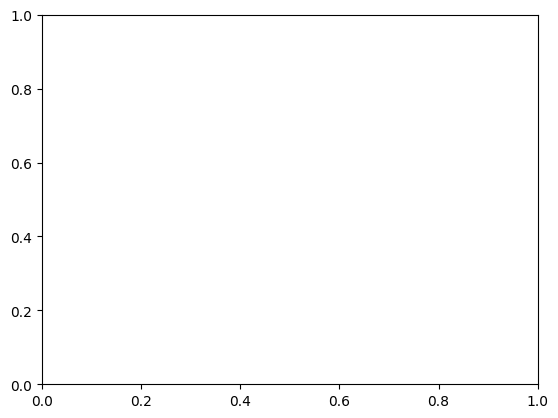

In [ ]:
# Directly from Imageset Dataset Testing
#Load Image and do Feature Extraction
path_to_image = "/content/SIBI/B/1645707911.0293028.jpg"

(pgelangX, pgelangY, pgelangZ,
 jempol_CmcX, jempol_CmcY, jempol_CmcZ,
 jempol_McpX, jempol_McpY, jempol_McpZ,
 jempol_IpX, jempol_IpY, jempol_IpZ,
 jempol_TipX, jempol_TipY, jempol_TipZ,
 telunjuk_McpX, telunjuk_McpY, telunjuk_McpZ,
 telunjuk_PipX, telunjuk_PipY, telunjuk_PipZ,
 telunjuk_DipX, telunjuk_DipY, telunjuk_DipZ,
 telunjuk_TipX, telunjuk_TipY, telunjuk_TipZ,
 tengah_McpX, tengah_McpY, tengah_McpZ,
 tengah_PipX, tengah_PipY, tengah_PipZ,
 tengah_DipX, tengah_DipY, tengah_DipZ,
 tengah_TipX, tengah_TipY, tengah_TipZ,
 manis_McpX, manis_McpY, manis_McpZ,
 manis_PipX, manis_PipY, manis_PipZ,
 manis_DipX, manis_DipY, manis_DipZ,
 manis_TipX, manis_TipY, manis_TipZ,
 kelingking_McpX, kelingking_McpY, kelingking_McpZ,
 kelingking_PipX, kelingking_PipY, kelingking_PipZ,
 kelingking_DipX, kelingking_DipY, kelingking_DipZ,
 kelingking_TipX, kelingking_TipY, kelingking_TipZ,
 output_IMG) = extract_feature(path_to_image)

print(pgelangX, pgelangY,
     jempol_CmcX, jempol_CmcY, jempol_McpX, jempol_McpY, jempol_IpX, jempol_IpY, jempol_TipX, jempol_TipY,
     telunjuk_McpX, telunjuk_McpY, telunjuk_PipX, telunjuk_PipY, telunjuk_DipX, telunjuk_DipY, telunjuk_TipX, telunjuk_TipY,
     tengah_McpX, tengah_McpY, tengah_PipX, tengah_PipY, tengah_DipX, tengah_DipY, tengah_TipX, tengah_TipY,
     manis_McpX, manis_McpY, manis_PipX, manis_PipY, manis_DipX, manis_DipY, manis_TipX, manis_TipY,
     kelingking_McpX, kelingking_McpY, kelingking_PipX, kelingking_PipY, kelingking_DipX, kelingking_DipY, kelingking_TipX, kelingking_TipY)
plt.axis("on")
# plt.imshow(cv.cvtColor(output_IMG, cv.COLOR_BGR2RGB))
plt.show()

In [ ]:
#Shape the image features into an 1x3 array.
input_IMG = np.array([[[pgelangX], [pgelangY], [pgelangZ],
                     [jempol_CmcX], [jempol_CmcY], [jempol_CmcZ],
                     [jempol_McpX], [jempol_McpY], [jempol_McpZ],
                     [jempol_IpX], [jempol_IpY], [jempol_IpZ],
                     [jempol_TipX], [jempol_TipY], [jempol_TipZ],
                     [telunjuk_McpX], [telunjuk_McpY], [telunjuk_McpZ],
                     [telunjuk_PipX], [telunjuk_PipY], [telunjuk_PipZ],
                     [telunjuk_DipX], [telunjuk_DipY], [telunjuk_DipZ],
                     [telunjuk_TipX], [telunjuk_TipY], [telunjuk_TipZ],
                     [tengah_McpX], [tengah_McpY], [tengah_McpZ],
                     [tengah_PipX], [tengah_PipY], [tengah_PipZ],
                     [tengah_DipX], [tengah_DipY], [tengah_DipZ],
                     [tengah_TipX], [tengah_TipY], [tengah_TipZ],
                     [manis_McpX], [manis_McpY], [manis_McpZ],
                     [manis_PipX], [manis_PipY], [manis_PipZ],
                     [manis_DipX], [manis_DipY], [manis_DipZ],
                     [manis_TipX], [manis_TipY], [manis_TipZ],
                     [kelingking_McpX], [kelingking_McpY], [kelingking_McpZ],
                     [kelingking_PipX], [kelingking_PipY], [kelingking_PipZ],
                     [kelingking_DipX], [kelingking_DipY], [kelingking_DipZ],
                     [kelingking_TipX], [kelingking_TipY], [kelingking_TipZ]]])

print(input_IMG.shape)
print(input_IMG)

(1, 63, 1)
[[[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]]]


In [ ]:
#Print prediction using defined Classes
input_IMG
predictions = model.predict(input_IMG)
predicted_class_index = np.argmax(predictions, axis=1)[0]

for alphabet, value in classes.items():
    if value == predicted_class_index:
        print(f"Possible Class Index: {value}")
        print(f"Possible Alphabet according to the input: {alphabet}")

1/1 [==============================] - 1s 571ms/step
Possible Class Index: 4
Possible Alphabet according to the input: E
